In [1]:
import torch
from torch.functional import F
import torchvision.transforms as T

import numpy as np
import matplotlib.pyplot as plt

import src.config as cfg
import src.LoadData as LD
from src.model import Generator, Discriminator
from src.train_model import train, check_accuracy, generate_samples

%load_ext autoreload
%autoreload 2



# Loading the data

In [2]:
MNIST_train = LD.load_mnist(cfg.MNIST_PATH,"train")
MNIST_test = LD.load_mnist(cfg.MNIST_PATH,"t10k")
std = np.std(MNIST_train[0])
mean = np.mean(MNIST_train[0])
MNIST_train, MNIST_validation = LD.split(MNIST_train,cfg.TRAIN_VAL_SPLIT)

mean: 72.94035223214286
std: 90.02118235130519
(28, 28, 1)


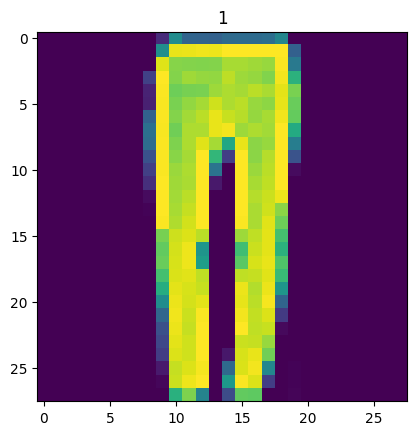

In [3]:
plt.imshow(MNIST_train[0][4])
plt.title(MNIST_train[1][4])
print("mean:",mean)
print("std:",std)
print(MNIST_train[0][4].shape)

In [4]:
transformations = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=0, std=1)
])

In [5]:

trainDS,trainLoader = LD.get_dataloader(MNIST_train,transformations,cfg.BATCH_SIZE,shuffle=True)
valDS,valLoader = LD.get_dataloader(MNIST_validation,transformations,cfg.BATCH_SIZE,shuffle=True)
testDS,testLoader = LD.get_dataloader(MNIST_test,transformations,cfg.BATCH_SIZE,shuffle=True)


# Model

In [6]:
D_model = Discriminator()
G_model = Generator(cfg.NOISE_DIM)

D_optimizer = torch.optim.Adam(D_model.parameters(),lr=cfg.D_LEARNING_RATE,betas=(cfg.BETA1,cfg.BETA2))
G_optimizer = torch.optim.Adam(G_model.parameters(),lr=cfg.G_LEARNING_RATE,betas=(cfg.BETA1,cfg.BETA2))

D_lossFunction = F.cross_entropy
G_lossFunction = F.cross_entropy




EPOCH 0
D loss: = 1.1353, G loss:  1.0572
D train accuracy: 65.55%, G train accuracy: (6.72)%
D val accuracy: 64.79%, G val accuracy: (6.83)%


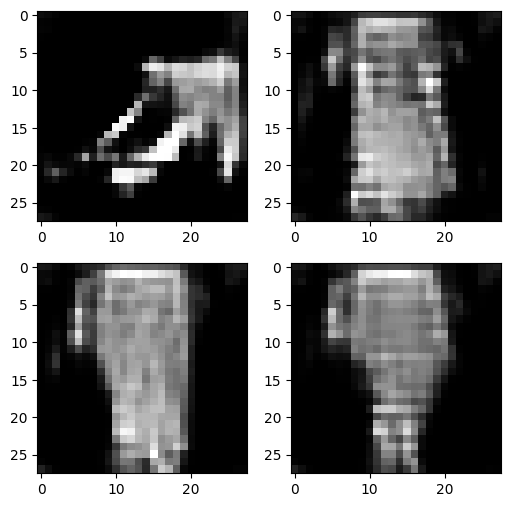

epoch time: 21.433460474014282

EPOCH 1
D loss: = 1.1931, G loss:  1.0883
epoch time: 13.610977172851562

EPOCH 2
D loss: = 1.2013, G loss:  1.0669
D train accuracy: 72.49%, G train accuracy: (6.18)%
D val accuracy: 72.49%, G val accuracy: (6.35)%


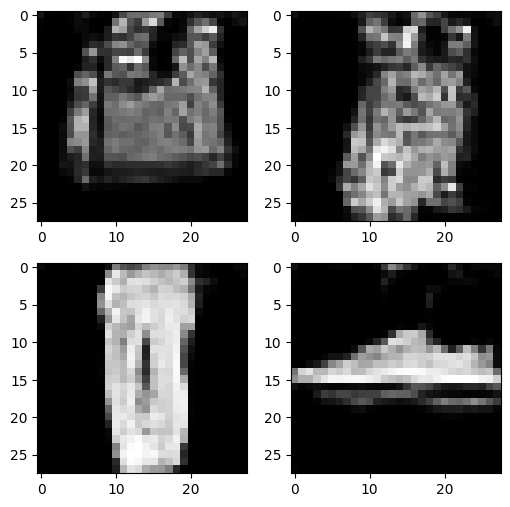

epoch time: 18.82796573638916

EPOCH 3
D loss: = 1.0003, G loss:  1.1034
epoch time: 13.366475582122803

EPOCH 4
D loss: = 0.8974, G loss:  1.2490
D train accuracy: 60.77%, G train accuracy: (3.01)%
D val accuracy: 60.62%, G val accuracy: (3.18)%


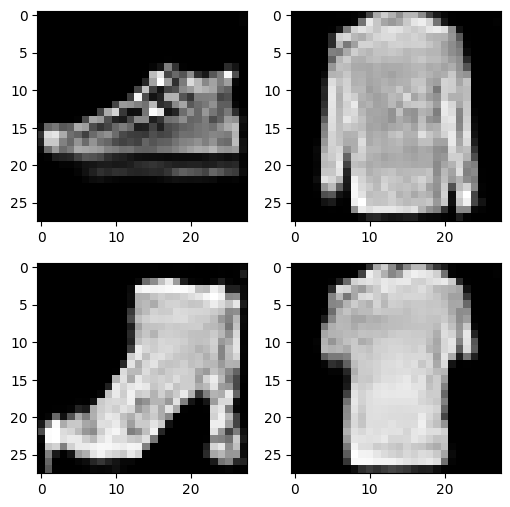

epoch time: 18.715967178344727

EPOCH 5
D loss: = 1.0034, G loss:  1.2265
epoch time: 14.002474069595337

EPOCH 6
D loss: = 0.8699, G loss:  1.2616
D train accuracy: 61.08%, G train accuracy: (2.51)%
D val accuracy: 61.11%, G val accuracy: (2.57)%


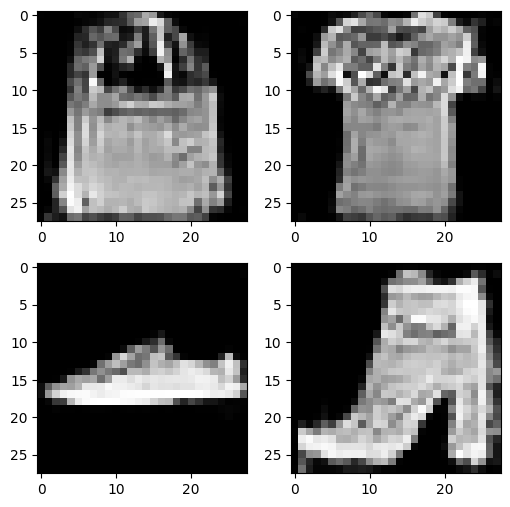

epoch time: 19.59746503829956

EPOCH 7
D loss: = 0.9152, G loss:  1.2798
epoch time: 14.149975299835205

EPOCH 8
D loss: = 0.8895, G loss:  1.2964
D train accuracy: 70.37%, G train accuracy: (6.76)%
D val accuracy: 70.57%, G val accuracy: (6.85)%


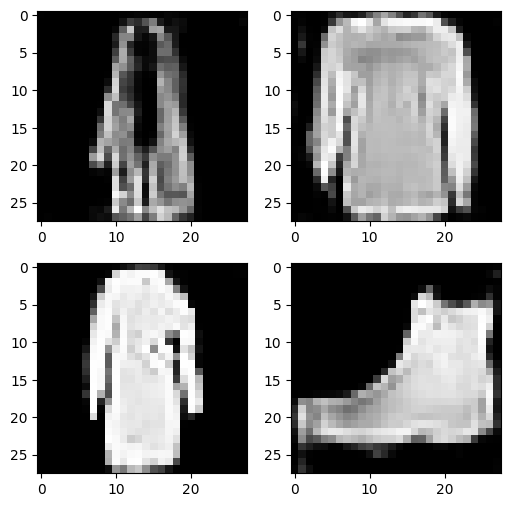

epoch time: 19.986963510513306

EPOCH 9
D loss: = 0.8060, G loss:  1.2180
epoch time: 14.60347294807434

EPOCH 10
D loss: = 0.9008, G loss:  1.2918
D train accuracy: 70.58%, G train accuracy: (5.01)%
D val accuracy: 71.03%, G val accuracy: (4.70)%


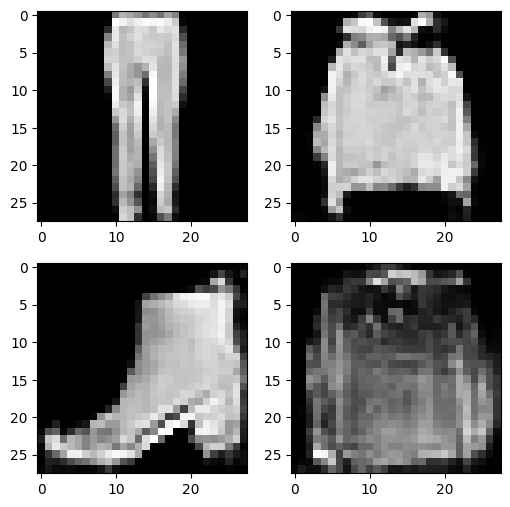

epoch time: 19.125465869903564

EPOCH 11
D loss: = 0.9104, G loss:  0.9967
epoch time: 14.028474807739258

EPOCH 12
D loss: = 0.8324, G loss:  1.3080
D train accuracy: 49.90%, G train accuracy: (0.37)%
D val accuracy: 49.88%, G val accuracy: (0.37)%


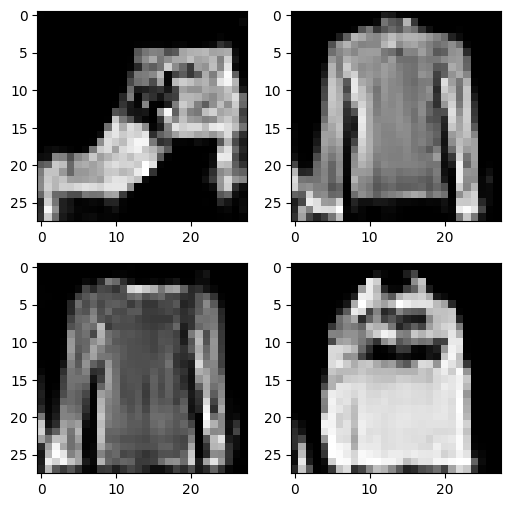

epoch time: 19.36446499824524

EPOCH 13
D loss: = 0.8828, G loss:  1.2832
epoch time: 14.137474775314331

EPOCH 14
D loss: = 0.7932, G loss:  1.2904
D train accuracy: 56.62%, G train accuracy: (0.76)%
D val accuracy: 56.82%, G val accuracy: (0.70)%


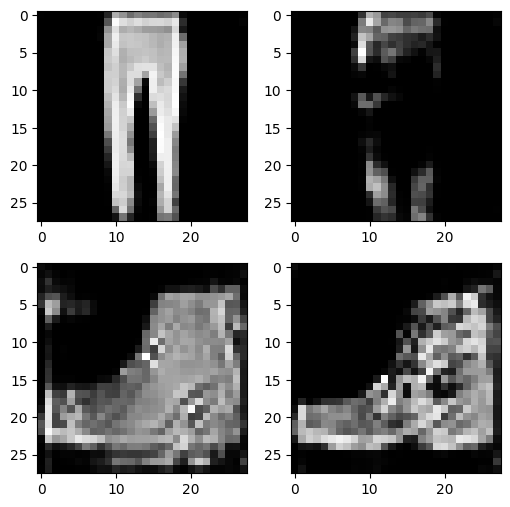

epoch time: 19.711464166641235

EPOCH 15
D loss: = 0.8255, G loss:  1.1652
epoch time: 14.21797490119934

EPOCH 16
D loss: = 0.7622, G loss:  1.3005
D train accuracy: 61.88%, G train accuracy: (1.61)%
D val accuracy: 62.05%, G val accuracy: (1.83)%


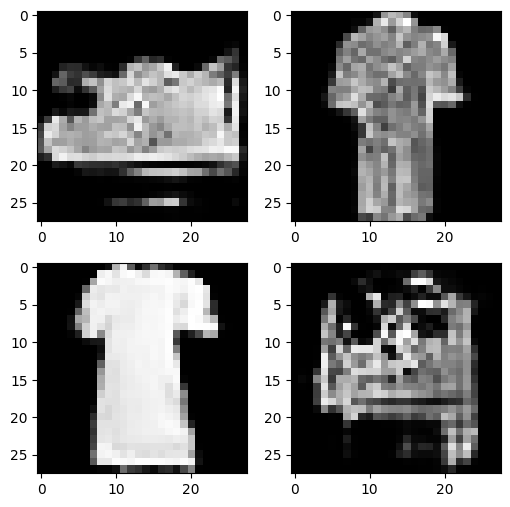

epoch time: 19.029465913772583

EPOCH 17
D loss: = 0.8173, G loss:  1.3104
epoch time: 13.89847469329834

EPOCH 18
D loss: = 0.8070, G loss:  1.2997
D train accuracy: 51.78%, G train accuracy: (0.50)%
D val accuracy: 51.50%, G val accuracy: (0.70)%


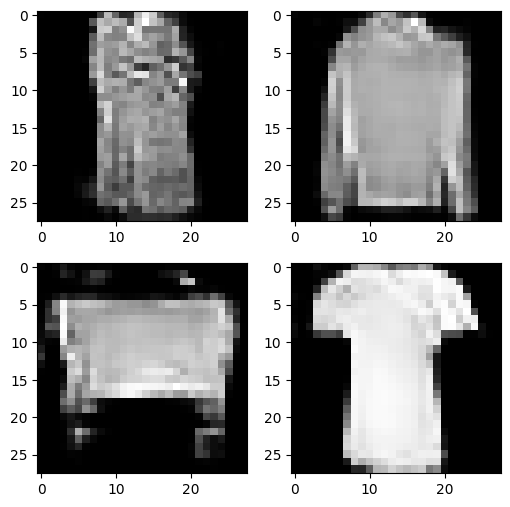

epoch time: 19.704464435577393

EPOCH 19
D loss: = 0.8081, G loss:  1.2557
epoch time: 13.831975221633911


In [7]:
train_acc_D,train_acc_G,val_acc_D,val_acc_G,D_hist,G_hist,img_hist = train(D_model,G_model,trainLoader,valLoader,D_optimizer,G_optimizer,D_lossFunction,G_lossFunction,verbose=3,save_checkpoints="deep",eval_every=cfg.EVAL_EVERY)

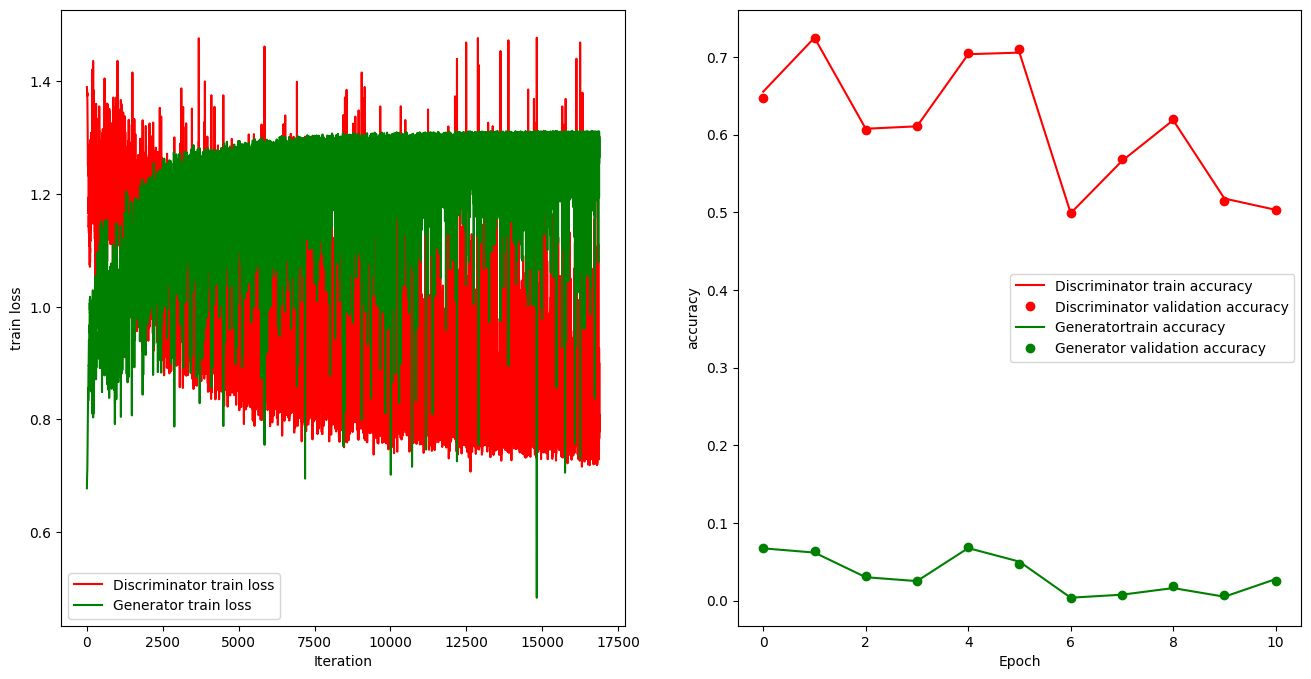

In [8]:

fig,axes = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(16)
axes[0].plot([i for i in D_hist["train_loss"]],'r',label="Discriminator train loss")
axes[0].plot([i for i in G_hist["train_loss"]],'g',label="Generator train loss")
axes[0].set_ylabel("train loss")
axes[0].set_xlabel("Iteration")
axes[0].legend(loc="best")


axes[1].plot(D_hist["train_accuracy"],'r',label="Discriminator train accuracy")
axes[1].plot(D_hist["val_accuracy"],'or',label="Discriminator validation accuracy")
axes[1].plot(G_hist["train_accuracy"],'g',label="Generatortrain accuracy")
axes[1].plot(G_hist["val_accuracy"],'og',label="Generator validation accuracy")
axes[1].set_ylabel("accuracy")
axes[1].set_xlabel("Epoch")
axes[1].legend(loc="best")
plt.show()


In [9]:
test_acc_D,test_acc_G = check_accuracy(testLoader,D_model,G_model)

In [10]:
print('Discriminator train accuracy: %.2f, Discriminator val accuracy: %.2f, Discriminator test accuracy: %.2f' % (100 * train_acc_D,100*val_acc_D,100*test_acc_D))
print('Generator train accuracy: %.2f, Generator val accuracy: %.2f, Generator test accuracy: %.2f' % (100 * train_acc_G,100*val_acc_G,100*test_acc_G))

Discriminator train accuracy: 50.32, Discriminator val accuracy: 50.29, Discriminator test accuracy: 50.12
Generator train accuracy: 2.76, Generator val accuracy: 2.52, Generator test accuracy: 3.06


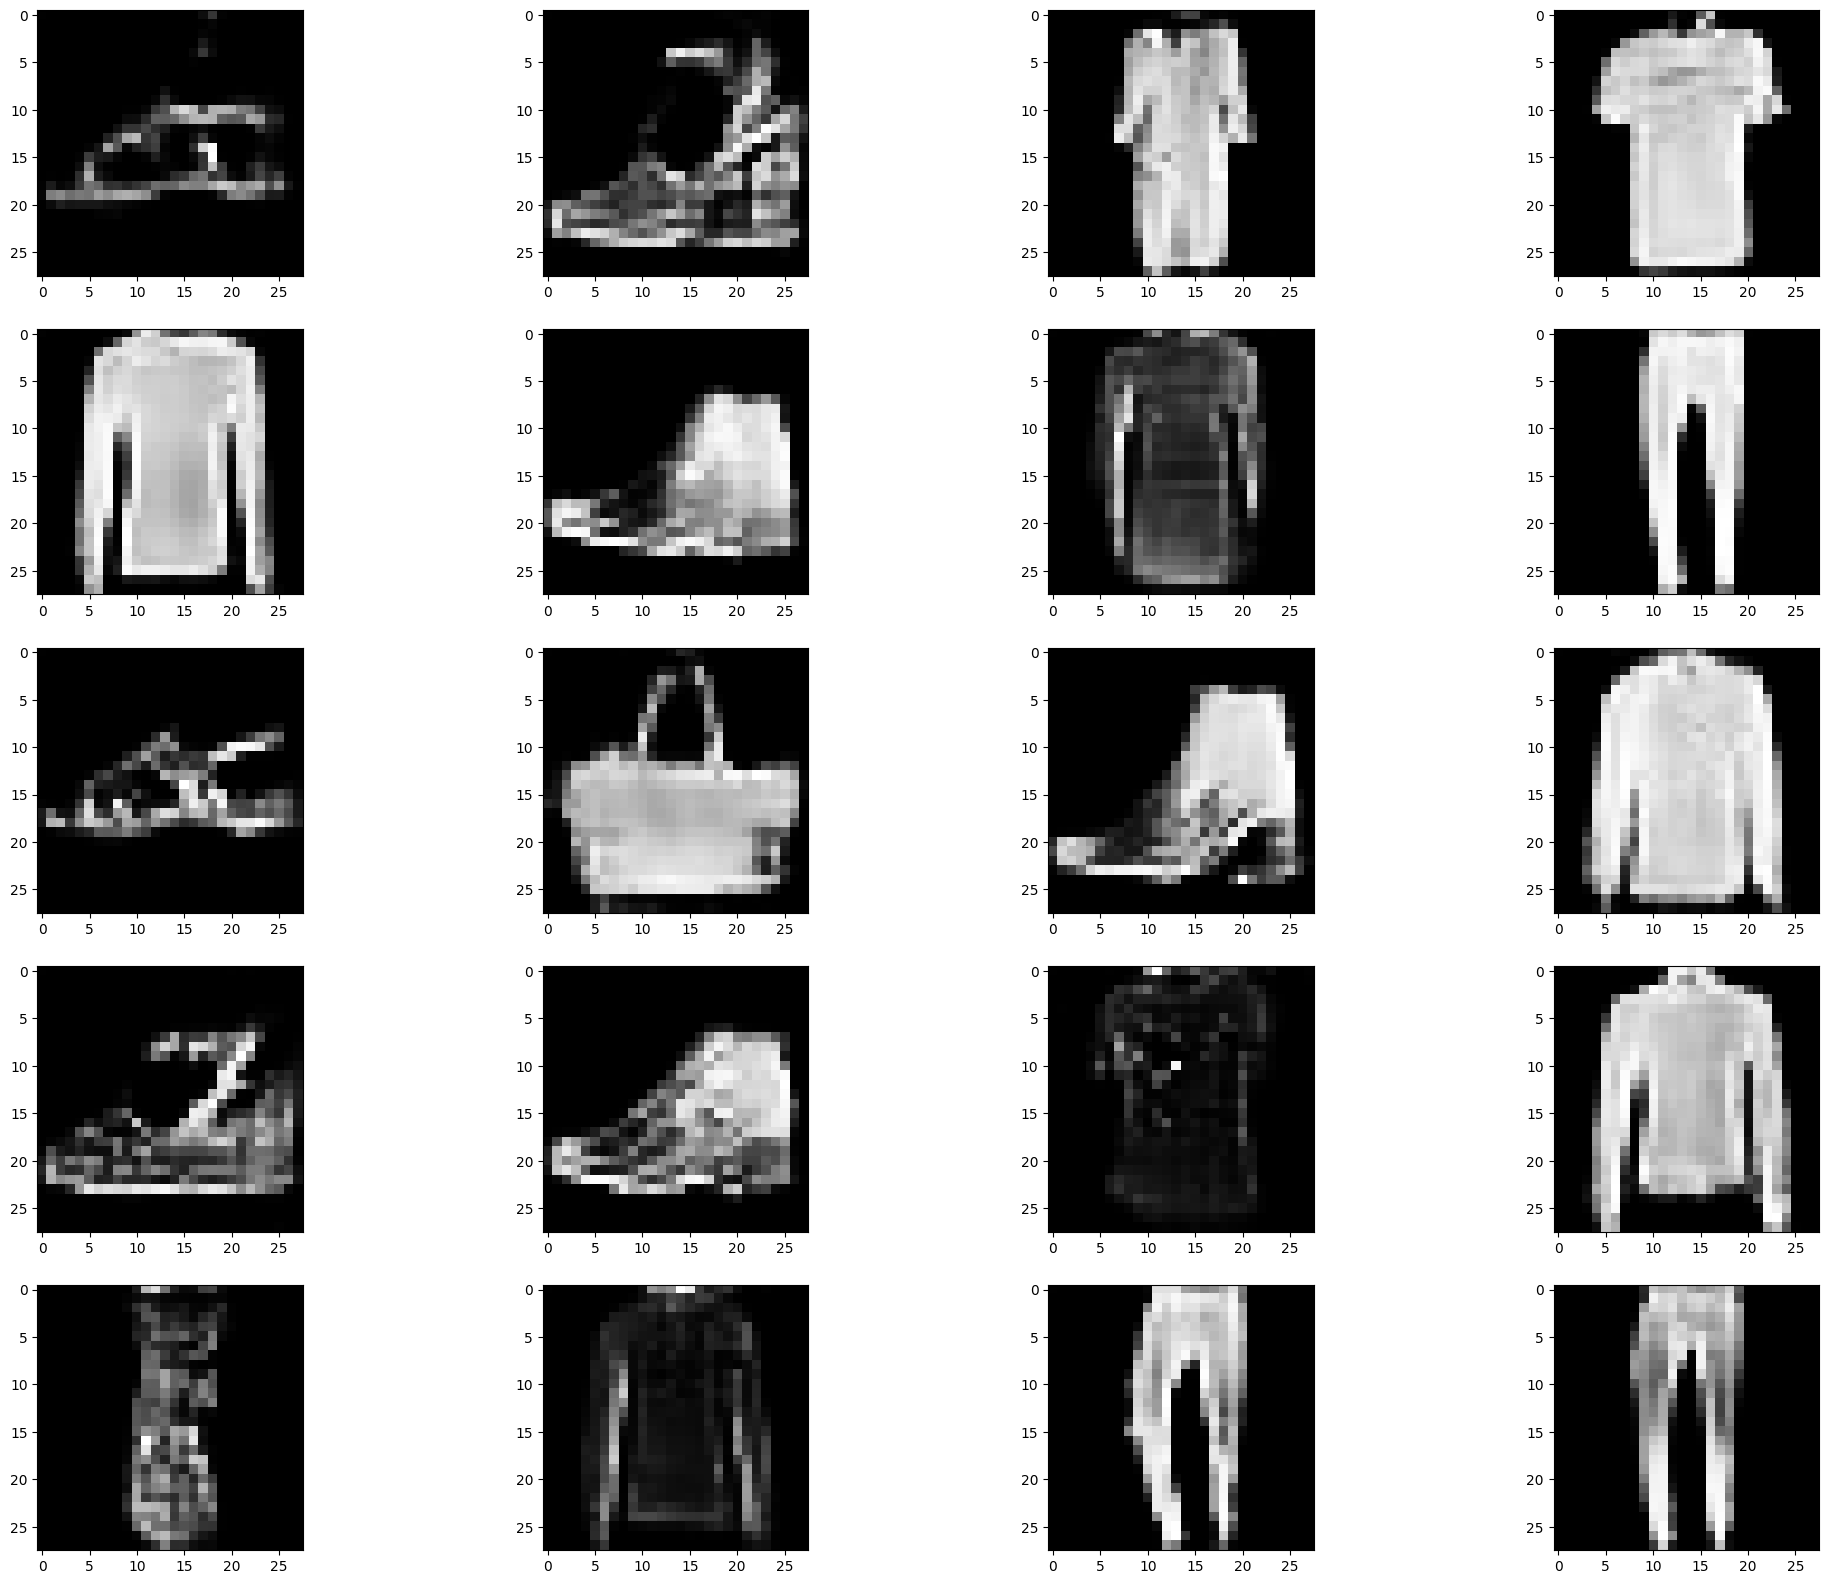

In [11]:
rows = 5
columns = 4

images = generate_samples(G_model,rows*columns)
fig, axes = plt.subplots(rows, columns)
fig.set_size_inches(5*rows,5*columns)
for i in range(rows):
    for j in range(columns):
        axes[i,j].imshow(images[i*columns + j],cmap="gray")

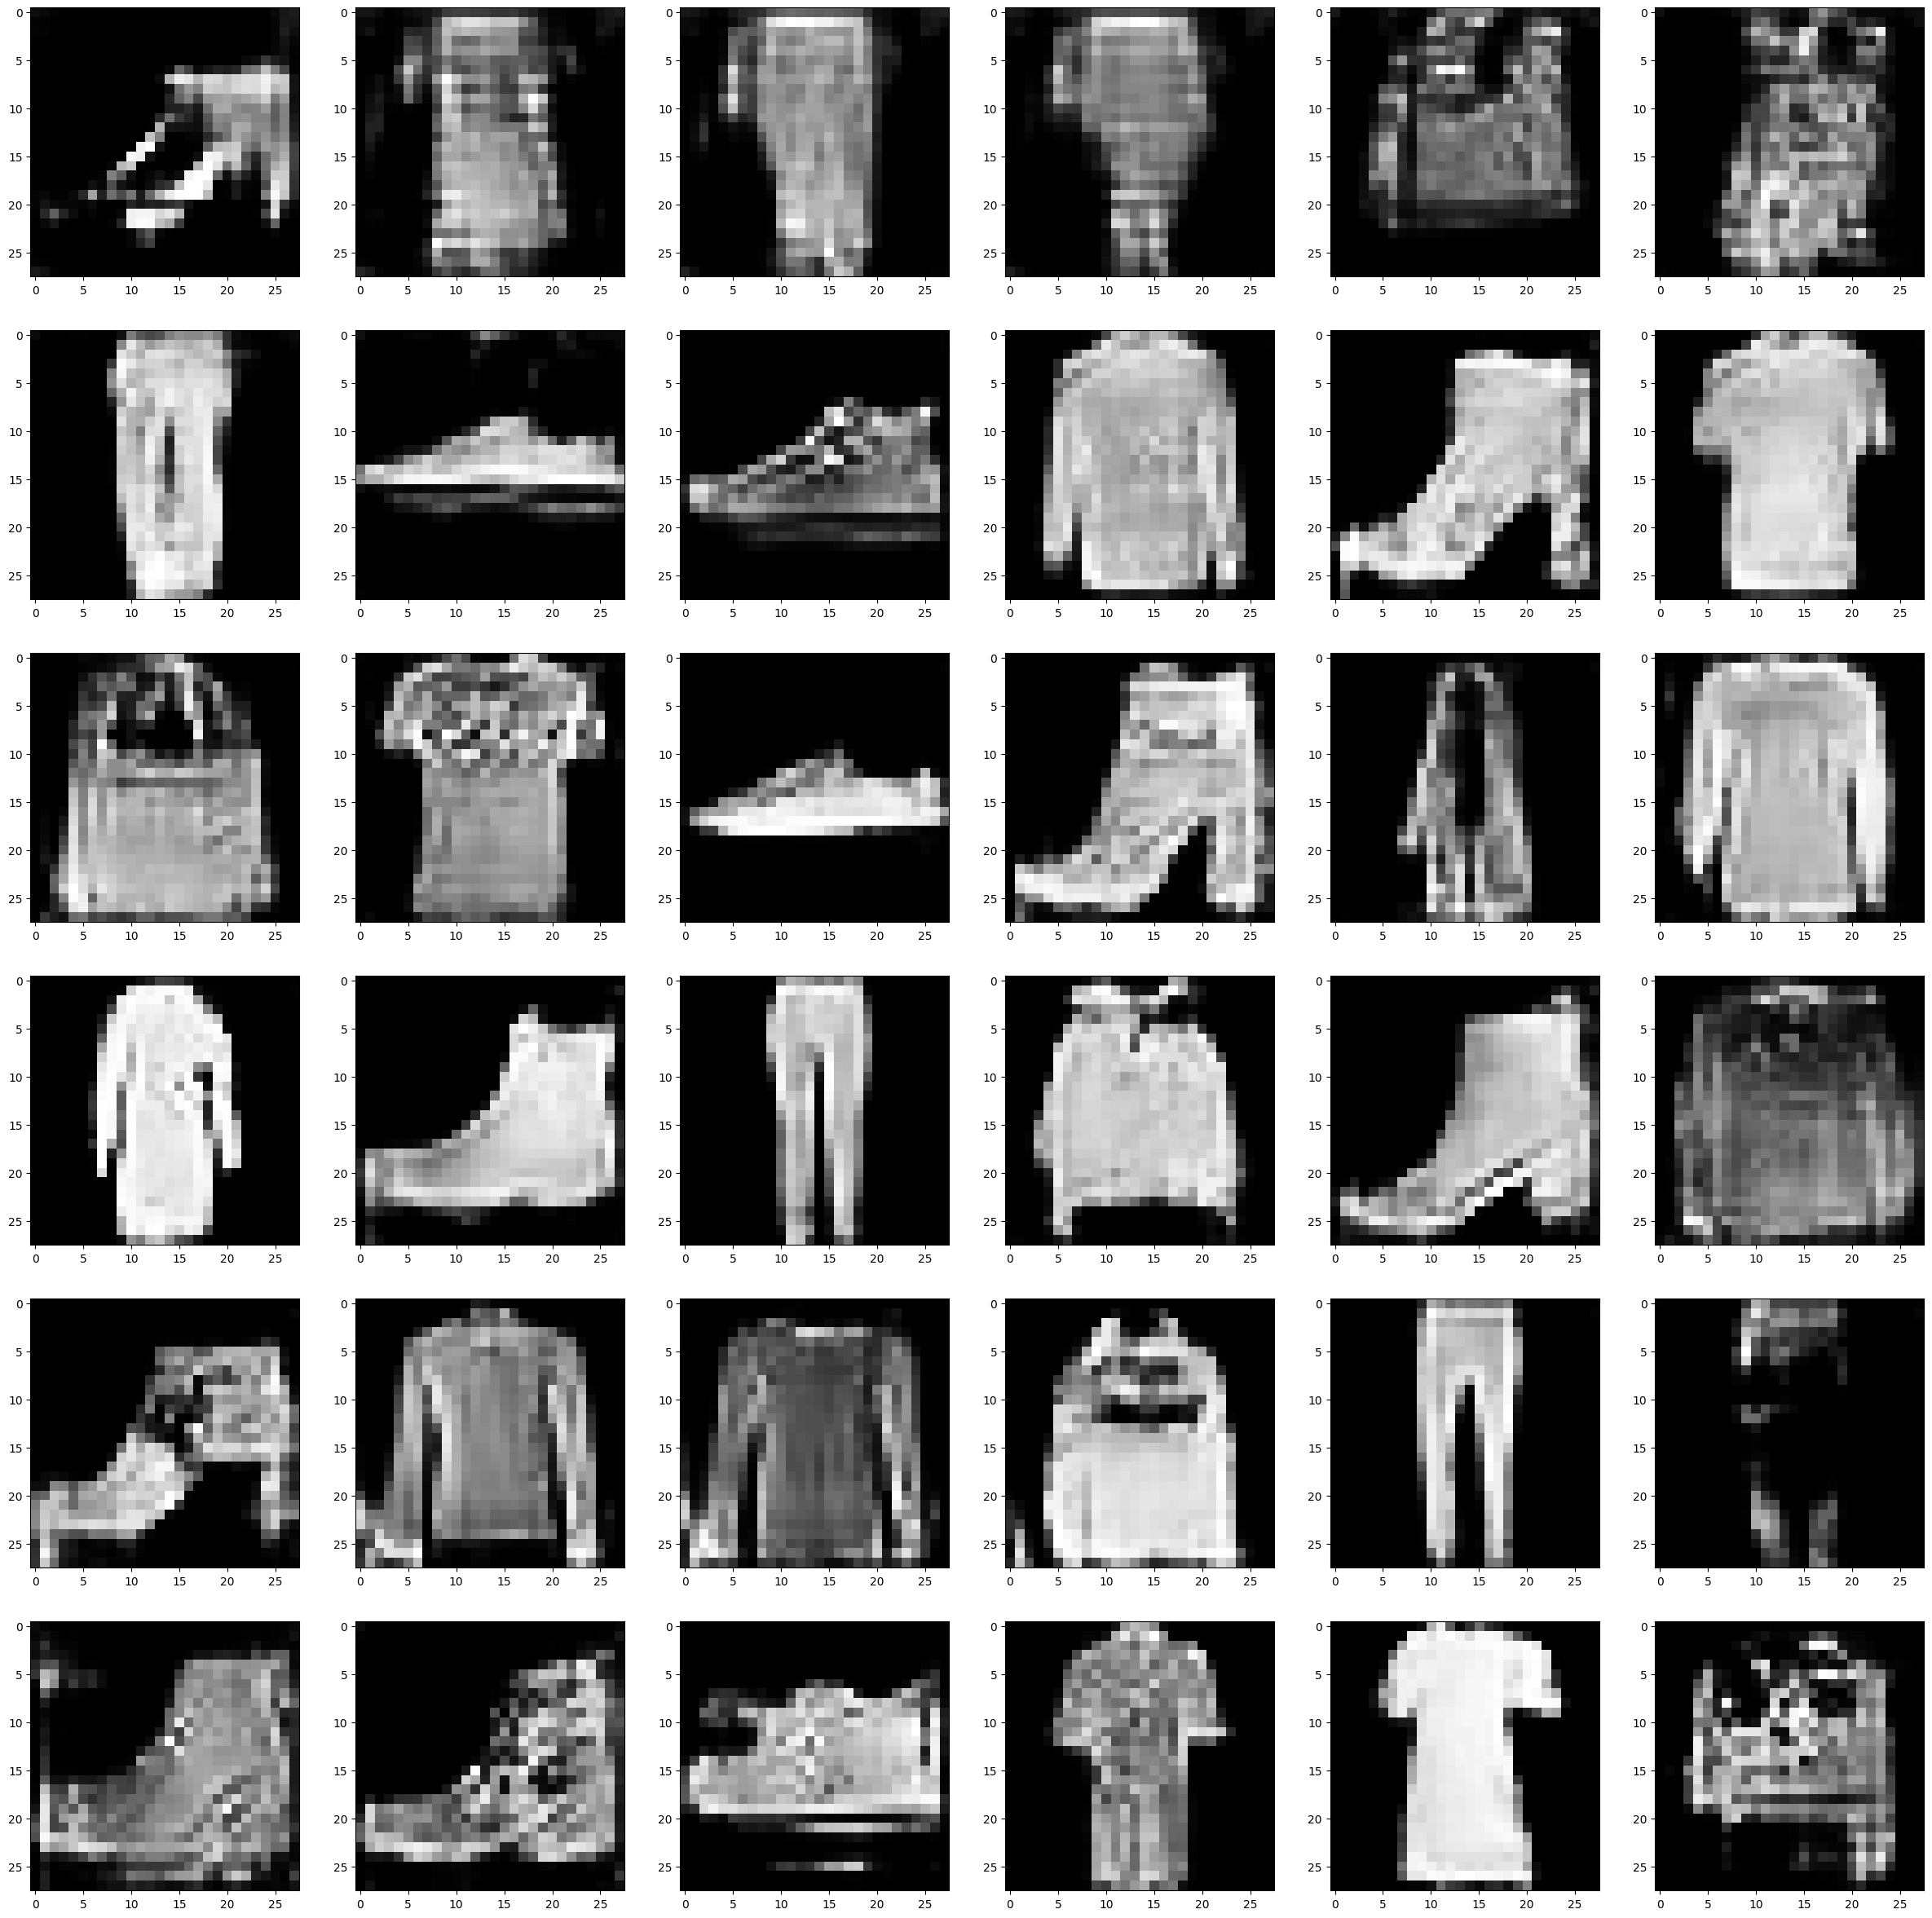

In [12]:
rows = min(10,int(np.sqrt(len(img_hist))))
columns = min(10,int(np.sqrt(len(img_hist))))

images = [img_hist[i*(int(len(img_hist)/(rows*columns)))] for i in range(rows*columns)]
idex =  [i*(int(len(img_hist)/(rows*columns))) for i in range(rows*columns)]
fig, axes = plt.subplots(rows, columns)
fig.set_size_inches(5*rows,5*columns)
for i in range(rows):
    for j in range(columns):
        axes[i,j].imshow(images[i*columns + j],cmap="gray")

In [13]:
len(img_hist)

40